In [1]:
path = '/Users/kaylakim/Documents/portfolio/Flight-delays-2018/'

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv(path + 'flight_delays_train.csv')
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [4]:
train.columns[4:7]

Index(['UniqueCarrier', 'Origin', 'Dest'], dtype='object')

In [5]:
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in 3 columns
for value in train[train.columns[4:7]]:
    train[value] = label_encoder.fit_transform(train[value])
train.head()


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,0,18,78,732,N
1,c-4,c-20,c-3,1548,18,217,171,834,N
2,c-9,c-2,c-5,1422,20,228,59,416,N
3,c-11,c-25,c-6,1015,15,78,175,872,N
4,c-10,c-7,c-6,1828,19,174,199,423,Y


In [6]:
train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min'],
      dtype='object')

In [7]:
import re
train[['Month', 'DayofMonth', 'DayOfWeek']] = train[['Month', 'DayofMonth', 'DayOfWeek']].map(lambda x: int(re.sub(r'[c-]', '', x)))
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,0,18,78,732,N
1,4,20,3,1548,18,217,171,834,N
2,9,2,5,1422,20,228,59,416,N
3,11,25,6,1015,15,78,175,872,N
4,10,7,6,1828,19,174,199,423,Y


In [8]:
train.dep_delayed_15min = train.dep_delayed_15min.map(lambda x: 1 if x == 'Y' else 0)
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,0,18,78,732,0
1,4,20,3,1548,18,217,171,834,0
2,9,2,5,1422,20,228,59,416,0
3,11,25,6,1015,15,78,175,872,0
4,10,7,6,1828,19,174,199,423,1


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min'],
      dtype='object')

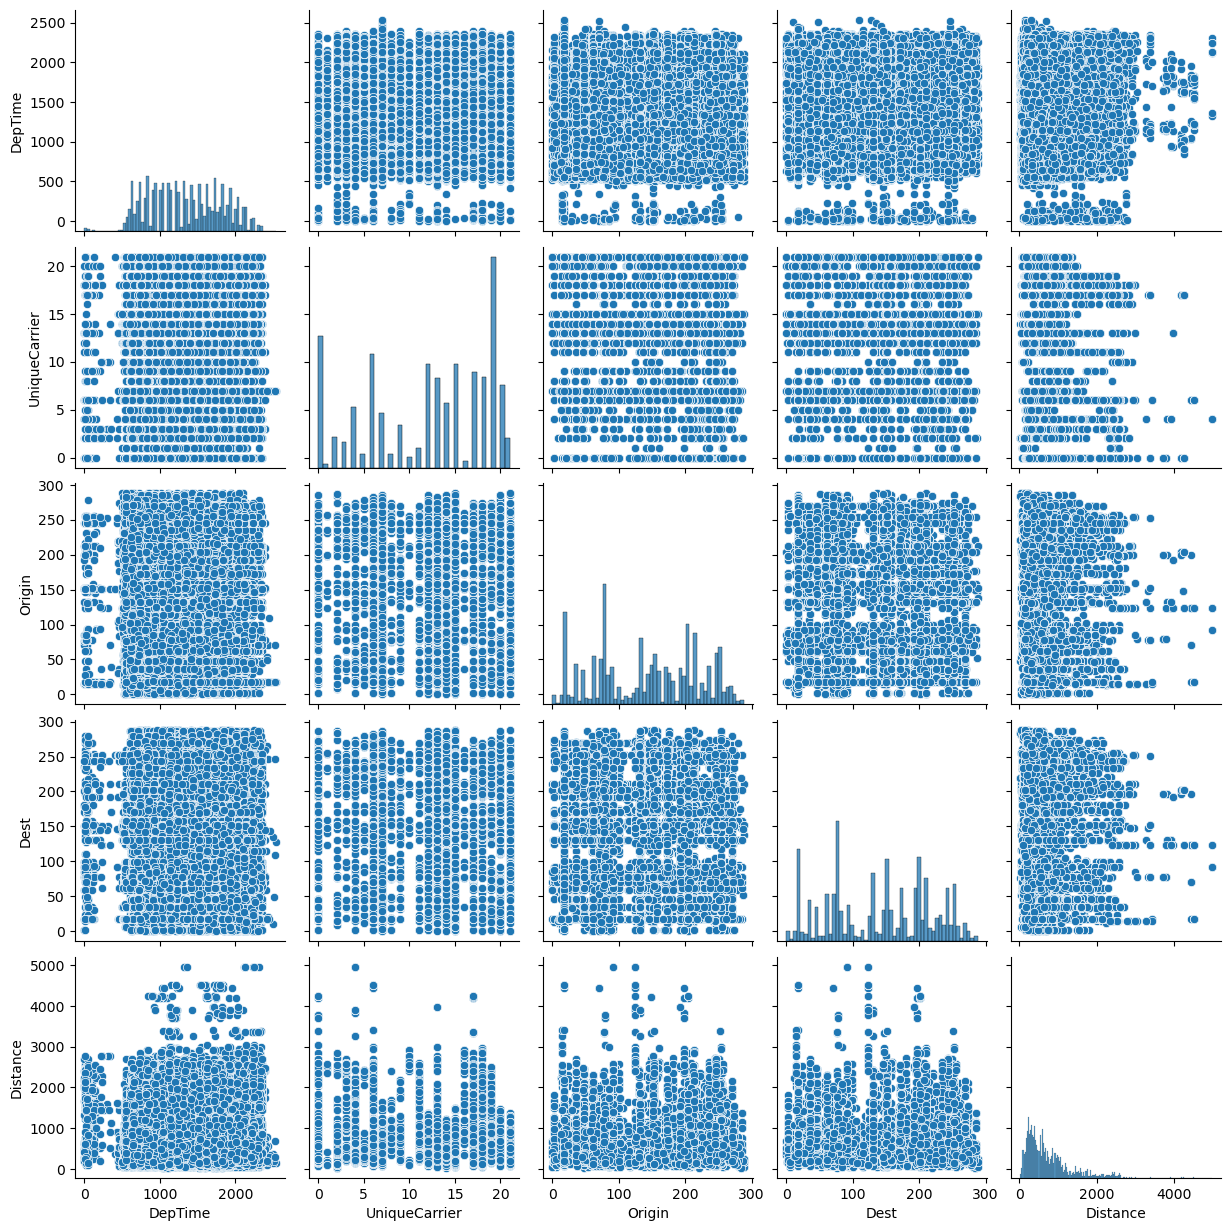

In [11]:
import seaborn as sns
sns.pairplot(train[['DepTime', 'UniqueCarrier', 'Origin', 'Dest', 'Distance']])

In [12]:
train.Distance.skew()

1.6576005526885804

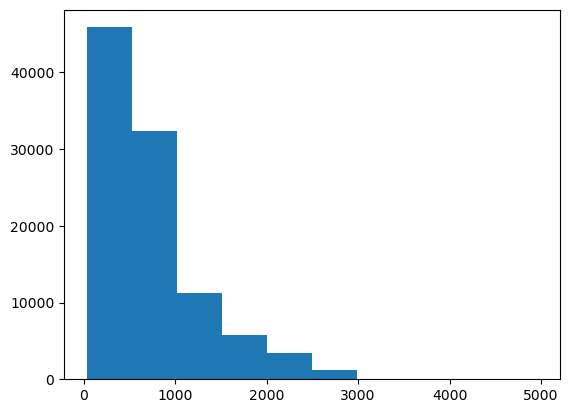

In [13]:
import matplotlib.pyplot as plt
plt.hist(train.Distance)
plt.show()

In [14]:
import numpy as np
train['Distance'] = np.log(train['Distance'])
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,0,18,78,6.595781,0
1,4,20,3,1548,18,217,171,6.726233,0
2,9,2,5,1422,20,228,59,6.030685,0
3,11,25,6,1015,15,78,175,6.770789,0
4,10,7,6,1828,19,174,199,6.047372,1


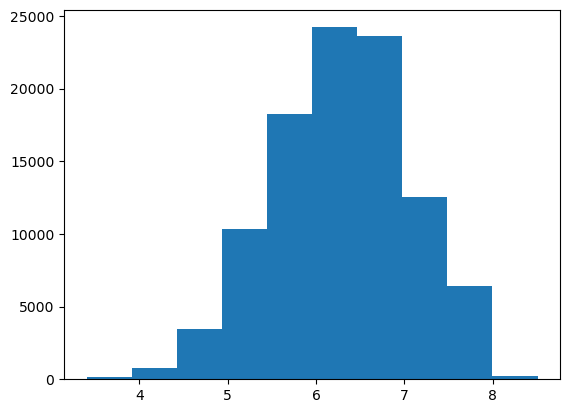

In [15]:
import matplotlib.pyplot as plt
plt.hist(train.Distance)
plt.show()

In [16]:
type(train.Month[5])

numpy.int64

In [17]:
test = pd.read_csv(path + 'flight_delays_test.csv')
test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month              100000 non-null  int64  
 1   DayofMonth         100000 non-null  int64  
 2   DayOfWeek          100000 non-null  int64  
 3   DepTime            100000 non-null  int64  
 4   UniqueCarrier      100000 non-null  int64  
 5   Origin             100000 non-null  int64  
 6   Dest               100000 non-null  int64  
 7   Distance           100000 non-null  float64
 8   dep_delayed_15min  100000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.9 MB


In [19]:
y = train['dep_delayed_15min']
# Drop ['date', 'num_sold'] columns
X = train.drop('dep_delayed_15min', axis=1)
X.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,8,21,7,1934,0,18,78,6.595781
1,4,20,3,1548,18,217,171,6.726233
2,9,2,5,1422,20,228,59,6.030685
3,11,25,6,1015,15,78,175,6.770789
4,10,7,6,1828,19,174,199,6.047372


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = np.round(model.predict_proba(X_valid), 3)

In [22]:
y_pred

array([[0.895, 0.105],
       [0.788, 0.212],
       [0.602, 0.398],
       ...,
       [0.688, 0.312],
       [0.703, 0.297],
       [0.722, 0.278]])

In [23]:
# check train, valid score
train_score = model.score(X_train, y_train)
valid_score = model.score(X_valid, y_valid)
print(f'train_score= {train_score*100} %')
print(f'valid_score= {valid_score*100} %')

train_score= 80.88285714285715 %
valid_score= 80.78666666666666 %


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
#print(f'accuracy= {accuracy_score(y_valid, y_pred)*100} %')

In [25]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_valid.values)[0].values,
                  'Prediction': pd.DataFrame(y_pred)[0].values})
df

,Actual,Prediction
0,0,0.895
1,0,0.788
2,0,0.602
3,0,0.847
4,0,0.920
...,...,...
29995,0,0.848
29996,0,0.662
29997,1,0.688
29998,1,0.703


In [26]:
sub = pd.read_csv(path + 'sample_submission.csv')
sub

,id,dep_delayed_15min
0,0,0.081
1,1,0.387
2,2,0.069
3,3,0.177
4,4,0.732
...,...,...
99995,99995,0.495
99996,99996,0.634
99997,99997,0.603
99998,99998,0.709


In [27]:
# Encode labels in 3 columns
for value in test[test.columns[4:7]]:
    test[value] = label_encoder.fit_transform(test[value])

test[['Month', 'DayofMonth', 'DayOfWeek']] = test[['Month', 'DayofMonth', 'DayOfWeek']].map(lambda x: int(re.sub(r'[c-]', '', x)))
test['Distance'] = np.log(test['Distance'])
test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,7,25,3,615,19,194,217,6.393591
1,4,17,2,739,17,155,129,7.118826
2,12,2,7,651,11,121,208,6.357842
3,3,25,7,1614,17,49,183,5.932245
4,6,6,3,1505,15,209,270,5.552960


In [28]:
test.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance'],
      dtype='object')

In [29]:
test = np.round(model.predict_proba(test), 3)
test

array([[0.928, 0.072],
       [0.927, 0.073],
       [0.911, 0.089],
       ...,
       [0.806, 0.194],
       [0.889, 0.111],
       [0.867, 0.133]])

In [30]:
sub.dep_delayed_15min = test
sub

,id,dep_delayed_15min
0,0,0.928
1,1,0.927
2,2,0.911
3,3,0.777
4,4,0.774
...,...,...
99995,99995,0.834
99996,99996,0.876
99997,99997,0.806
99998,99998,0.889


In [32]:
sub.to_csv('submission.csv', index=False)